In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from mlresearch.utils import set_matplotlib_style
from recgame.environments._cda_environment import ModelRetrainEnvironment
from recgame.environments import BaseEnvironment
from recgame.recourse import DiCE, NFeatureRecourse
from recgame.utils import generate_synthetic_data

In [2]:
set_matplotlib_style(16)

# Some variables to define the problem
RNG_SEED = 42
rng = np.random.default_rng(RNG_SEED+1)
N_CONTINUOUS = 2
N_CAT = 0
N_AGENTS = 100

# Environment variables
N_LOANS = 10  # np.array([20, 1, 10, 30, 0, 5, 50, 10, 40])
ADAPTATION = .1  # np.array([.2, .1, .3, .25, .1, .4, .05, .05, .2])
NEW_AGENTS = 10  # np.array([40, 10, 50, 5, 0, 100, 0, 0, 20])

df, y, categorical = generate_synthetic_data(N_AGENTS, N_CONTINUOUS, N_CAT, RNG_SEED)

# model = RandomForestClassifier().fit(df, y)
model = LogisticRegression().fit(df, y)

In [3]:
def data_source_func(n_agents):
    X, _, _ = generate_synthetic_data(
        n_agents=n_agents,
        n_continuous=N_CONTINUOUS,
        n_categorical=N_CAT,
        random_state=rng,
    )
    return X

# Environment experiment

In [4]:
# Define the necessary components to run simulation
recourse = NFeatureRecourse(model, categorical=categorical)
recourse.set_actions(df)
recourse.action_set_.ub = [2, 2]

environment = ModelRetrainEnvironment(
    X=df,
    recourse=recourse,
    data_source_func=data_source_func,
    threshold=N_LOANS,
    threshold_type="absolute",
    adaptation=ADAPTATION,
    behavior_function="binary_constant",
    growth_rate=NEW_AGENTS,
    growth_rate_type="absolute",
    random_state=RNG_SEED,
)

environment.simulate(9)

ModelRetrainEnvironment(X=         f_0       f_1
0   0.601572  0.153339
1   0.750150  0.813522
2  -0.150345  0.065940
3   0.542613  0.394586
4   0.494400  0.215652
..       ...       ...
95  1.074555  0.440160
96  0.372271  0.987148
97  0.130985  0.201758
98  0.714442  0.368465
99  0.498293  0.445519

[100 rows x 2 columns],
                        adaptation=0.1, behavior_function='binary_constant',
                        data_source_func=<function data_source_func at 0x7ff24c363250>,
                        growth_rate=10, growth_rate_type='absolute',
                        random_state=42,
                        recourse=NFeatureRecourse(categorical=[],
                                                  model=LogisticRegression(),
                                                  threshold=0.16693448398583255),
                        threshold=10)

In [5]:
environment.X_, environment.outcome_

from collections import Counter
Counter(environment.outcome_)

Counter({0: 90, 1: 10})

<Axes: title={'center': 'Population scores over 9 time steps'}, xlabel='Step', ylabel='Score'>

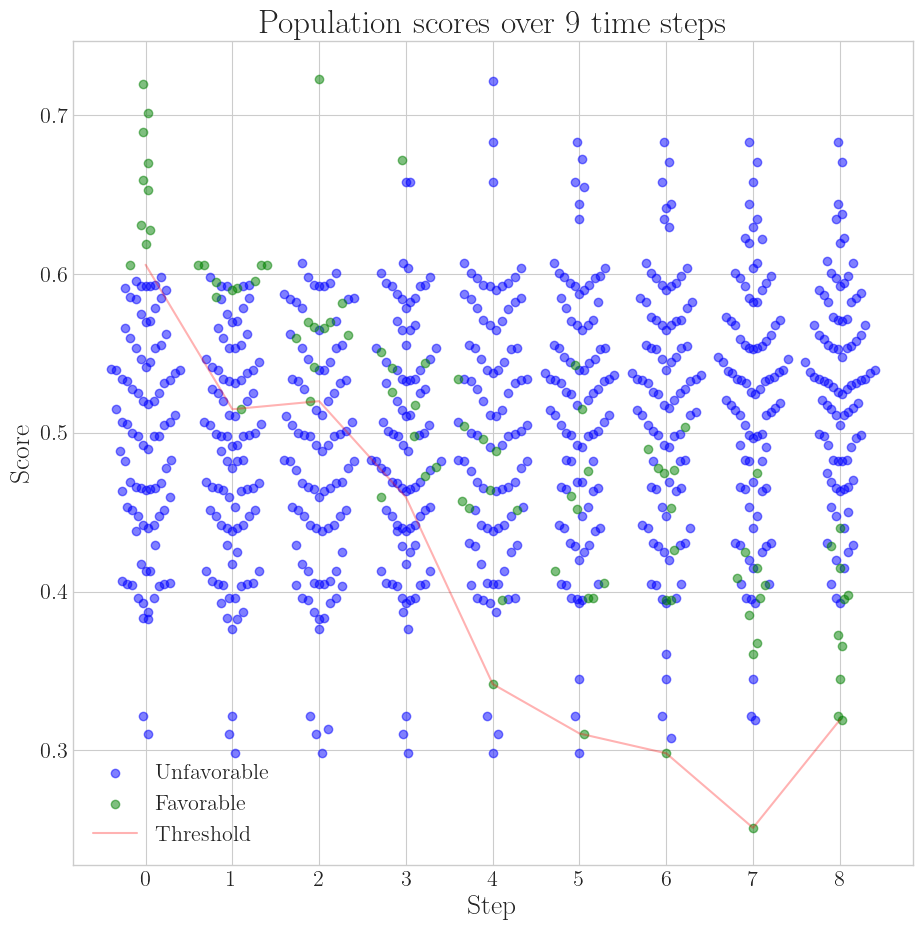

In [6]:
environment.plot.agent_scores(ref_model_step=0)

<Axes: title={'center': 'Population at t=5'}, xlabel='f_0', ylabel='f_1'>

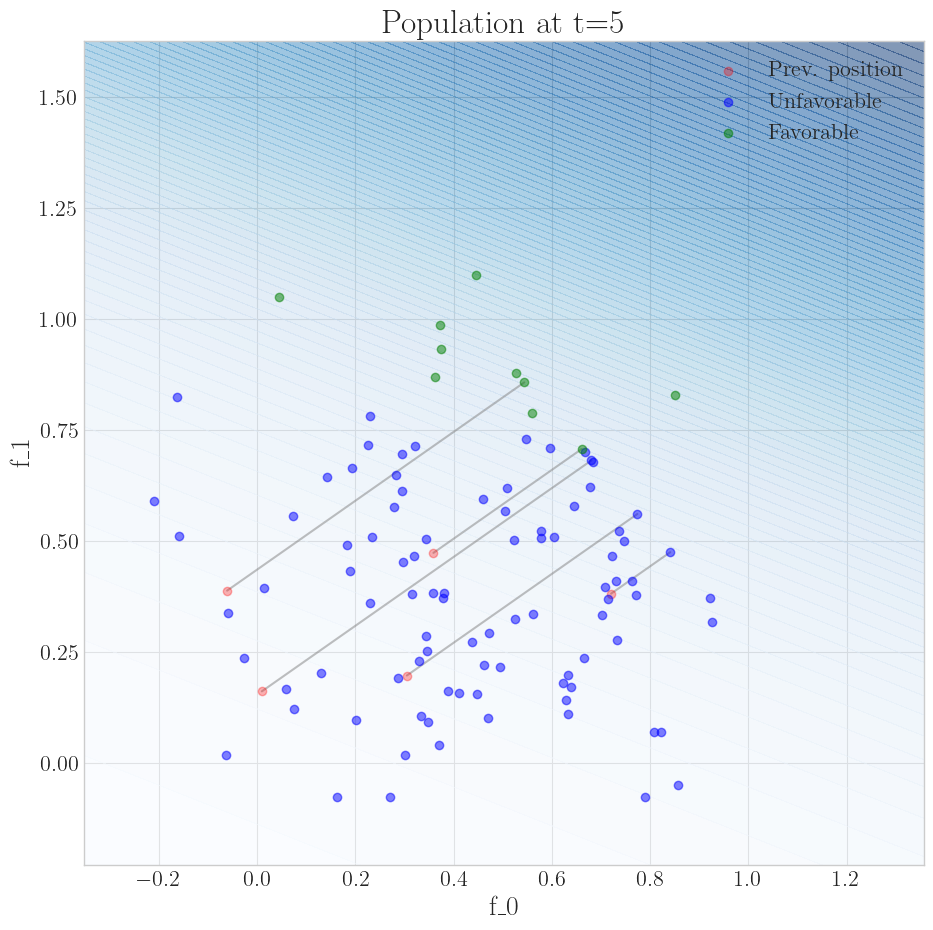

In [7]:
environment.plot.scatter(5)

<Axes: title={'center': 'Population at t=4'}, xlabel='f_0', ylabel='f_1'>

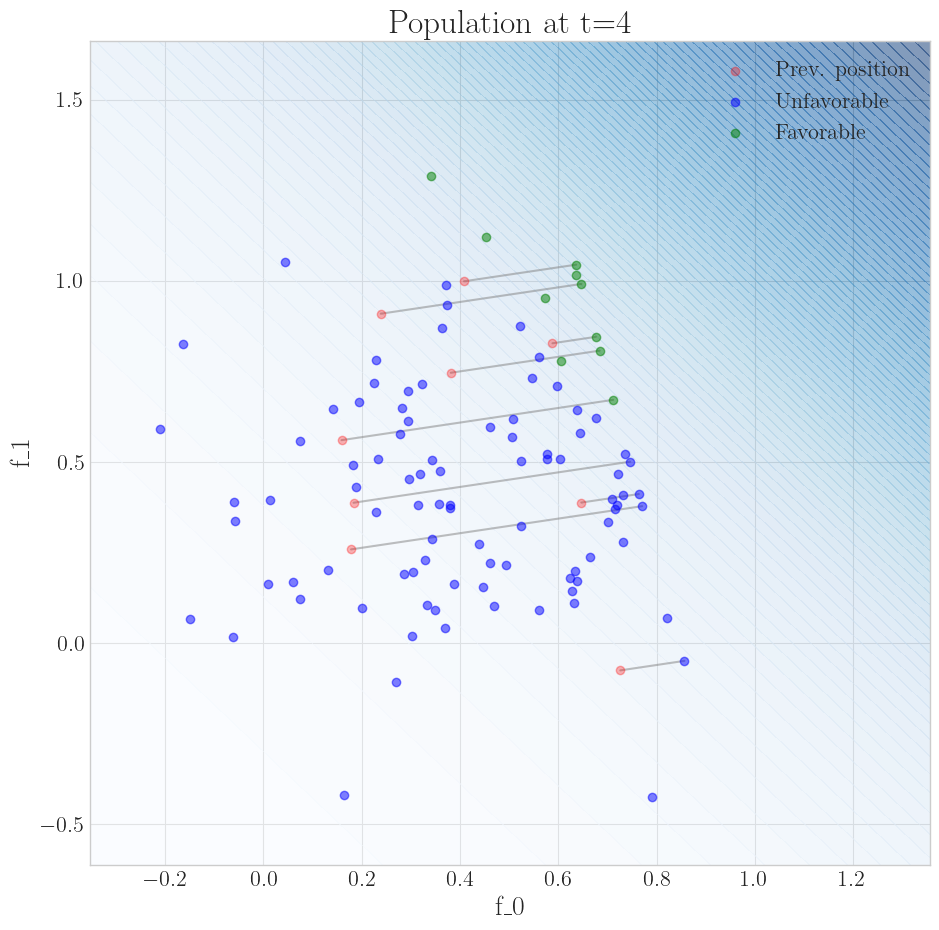

In [8]:
environment.plot.scatter(4)

<Axes: title={'center': 'Population at t=5'}, xlabel='f_0', ylabel='f_1'>

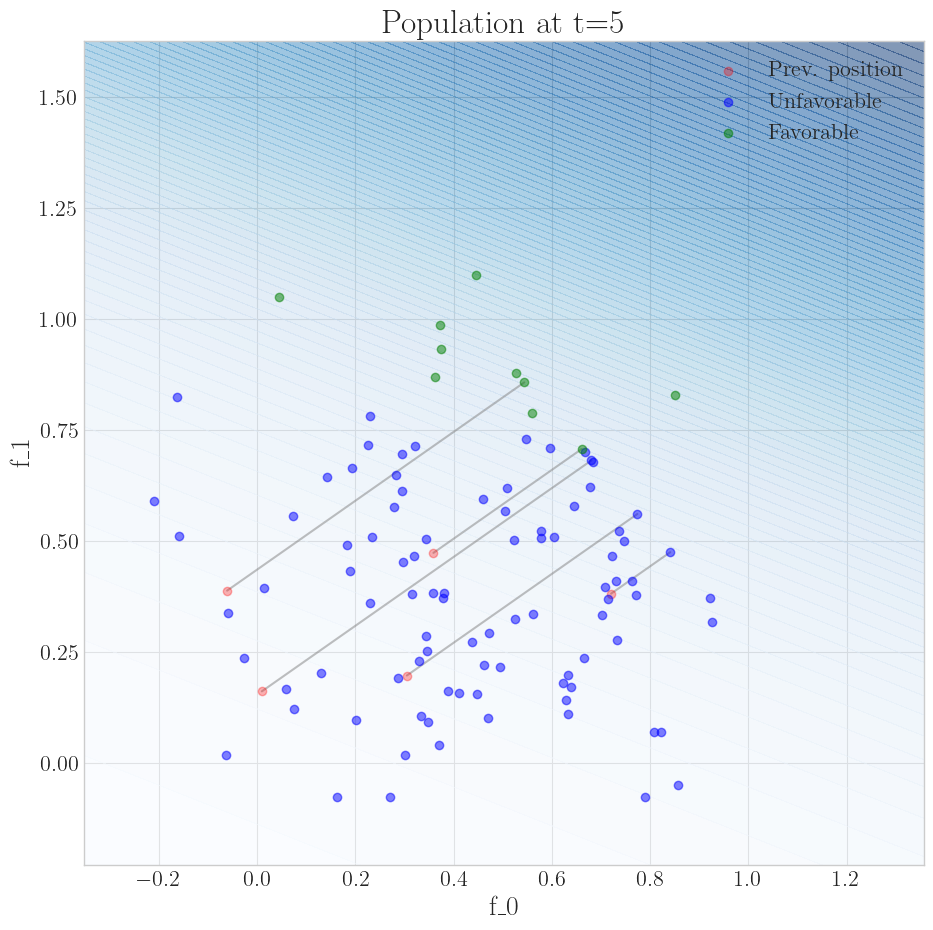

In [9]:
environment.plot.scatter(5)

<Axes: title={'center': 'Population at t=6'}, xlabel='f_0', ylabel='f_1'>

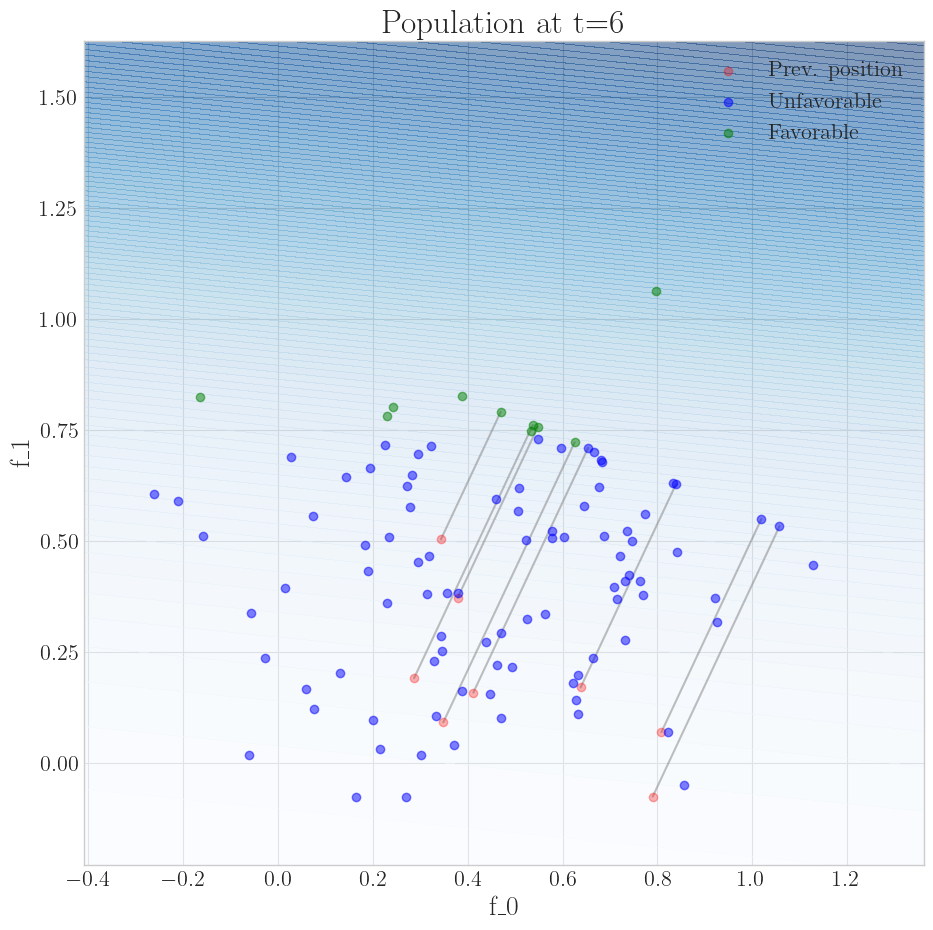

In [10]:
environment.plot.scatter(6)

In [11]:
from collections import Counter
Counter(environment.analysis.agents_info().n_failures)

Counter({0: 170, 1: 17, 2: 2, 3: 1})

In [12]:
environment.analysis.agents_info()

,entered_step,n_adaptations,favorable_step,original_score,final_score,n_failures
0,0,0,NaN,0.592102,NaN,0
1,0,0,2.0,0.519861,0.167612,0
2,0,0,NaN,0.417626,NaN,0
3,0,1,NaN,0.537543,NaN,0
4,0,0,NaN,0.555235,NaN,0
...,...,...,...,...,...,...
185,9,0,NaN,0.032397,NaN,0
186,9,0,NaN,0.096822,NaN,0
187,9,0,9.0,0.260329,0.260329,0
188,9,0,9.0,0.198281,0.198281,0


In [13]:
environment.analysis.steps_info()

,n_adapted,n_candidates,favorable_outcomes,success_rate,threshold,threshold_drift,new_agents,new_agents_proba,moving_agent_proba,success_proba
1,3.0,2.0,10.0,1.000000,0.150614,-0.751349,10.0,1.0,0.100000,0.429850
2,6.0,5.0,10.0,0.600000,0.164257,0.090588,10.0,1.0,0.100000,0.298659
3,8.0,4.0,10.0,1.000000,0.175530,0.068630,10.0,1.0,0.100000,0.189439
4,9.0,8.0,10.0,0.625000,0.177656,0.012111,10.0,1.0,0.100000,0.108969
5,5.0,5.0,10.0,0.400000,0.179406,0.009848,10.0,1.0,0.111111,0.032322
6,8.0,8.0,10.0,0.500000,0.181384,0.011026,10.0,1.0,0.111111,0.014408
7,6.0,4.0,10.0,0.500000,0.166144,-0.084020,10.0,1.0,0.088889,0.019995
8,8.0,7.0,10.0,0.285714,0.166934,0.004757,10.0,1.0,0.100000,0.003782
9,8.0,7.0,10.0,0.285714,0.197791,0.184840,10.0,1.0,0.133333,0.000128
